In [1]:
import numpy as np
import pandas as pd
import ssl
import copy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import random
import pickle
from pprint import pprint


from sklearn.metrics import hamming_loss, roc_auc_score
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import wordcloud

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC, NuSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer


import scikitplot as skplt
import matplotlib.pyplot as plt

from keras import optimizers
from keras.losses import binary_crossentropy
from keras.metrics import binary_accuracy
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

from scipy.special import softmax

ssl._create_default_https_context = ssl._create_unverified_context

Using TensorFlow backend.


In [2]:
def clean_statement(statement):
#     x = re.sub('-', ' ', x)
    statement = re.sub('$', ' ', statement)
    statement = re.sub('[^A-Za-z]+', ' ', statement)
    statement = re.sub('[,|.|?|\n]|\t', '', statement)
    statement = re.sub('n\'t', ' ', statement)
    statement = re.sub('submission|submissions|Submission|submission|th ', '', statement)
    statement = re.sub('one|two|given|need', '', statement)
    
    return statement

In [3]:
def process_problem_statement(q_statement):
    
    q_statement = clean_statement(q_statement)
    
#     q_statement = re.sub('[^A-Za-z]+', ' ', q_statement)
    
    tokens = word_tokenize(q_statement)
    
    stoplist = set(stopwords.words('english'))
    
    word_list = [i for i in q_statement.lower().split() if i not in stoplist]
    
    ps = PorterStemmer()
    
#     word_list = [ps.stem(word) for word in word_list]
    
    q_statement = ' '.join(word_list)
    
#     print(q_statement)
    
    return q_statement

In [4]:
def process_problem_solution(solution):
    
#     solution = clean_statement(solution)
    
    tokens = word_tokenize(solution)
    
    stoplist = set(stopwords.words('english'))
    
    word_list = [i for i in solution.lower().split() if i not in stoplist]
    
#     ps = PorterStemmer()
    
#     word_list = [ps.stem(word) for word in word_list]
    
    solution = ' '.join(word_list)
    
#     print(q_statement)
    
    return solution

In [5]:
def process_time_taken(time_col):
#     print(time_col.split())
    return time_col.split()[0]

In [6]:
def process_tags(all_tags_list,tag_col):
    
#     print(tag_col)
    tags_present = list(re.split(',',tag_col))
    return tags_present

In [7]:
def get_all_distinct_tags(tags_col):
    
    tags_list = []
    
    t_sets = set(tags_list)
    
    for row in tags_col:
#         print(row)
        t_list = re.split(',',row)
#         print(t_list)
        t_sets = t_sets.union(set(t_list))
#         print(t_sets)
    tags_list = list(t_sets)
    
    stoplist = set(stopwords.words('english'))
    
    word_list = [i for i in tags_list if i not in stoplist]
    
    return tags_list

In [8]:

tags_list = ['dsu', 'trees', 'chinese remainder theorem', 'sortings', 'games', 'implementation', 'bitmasks',
              '*special', 'hashing', 'geometry', 'two pointers', 'combinatorics', 'flows', 'strings',
              'probabilities', 'data structures', 'ternary search', 'greedy', 'math', 'matrices',
              'divide and conquer', 'dfs and similar', 'constructive algorithms', 'brute force', 'dp',
              '2-sat', 'graph matchings', 'binary search', 'number theory', 'graphs', 'fft', 'shortest paths',
              'schedules', 'meet-in-the-middle', 'string suffix structures', 'expression parsing']


In [9]:
def plot_class_distribution(Y,classes):
    
    count_list = [0]*Y.shape[1]
    
    for index in range(Y.shape[1]):
        
        count_list[index] = np.sum(Y[:,index])/Y.shape[0]
    
    plt.figure(figsize=(8, 8), dpi=100)
    
    plt.barh(classes,count_list, align='center', alpha=0.5)
#     plt.bar(np.arange(Y.shape[1]),count_list, align='center', alpha=0.5)
#     plt.plot(np.arange(Y.shape[1]),count_list)
    plt.show()

In [10]:
def data_preprocessing():
    
    global X, Y, mlb, distinct_tags
    
    df = pd.read_csv("codeforces_question_v5.csv")
    df = df.drop(['id','name','author'],axis = 1)
    df = df[df.solution != "no code found"]
    df = df.dropna()
    
    distinct_tags = get_all_distinct_tags(df["tags"])
    
    df["problem statement"] = [process_problem_statement(x) for x in df["problem statement"]]
#     df["solution"] = [process_problem_solution(x) for x in df["solution"]]
    df["time_taken"] = [process_time_taken(x) for x in df["time_taken"]]
    
    X = copy.deepcopy(df["solution"]+df["time_taken"])
#     X = copy.deepcopy(df["solution"])
    Y = [process_tags(distinct_tags,x) for x in df["tags"]]

    mlb = MultiLabelBinarizer()
    Y = mlb.fit_transform(Y)
    print(mlb.classes_)
    
    plot_class_distribution(Y,mlb.classes_)
    
#     print("Inside data_preprocessing")
#     print(type(X),type(Y),type(mlb))

['*special' '2-sat' 'binary search' 'bitmasks' 'brute force'
 'chinese remainder theorem' 'combinatorics' 'constructive algorithms'
 'data structures' 'dfs and similar' 'divide and conquer' 'dp' 'dsu'
 'expression parsing' 'fft' 'flows' 'games' 'geometry' 'graph matchings'
 'graphs' 'greedy' 'hashing' 'implementation' 'math' 'matrices'
 'meet-in-the-middle' 'number theory' 'probabilities' 'schedules'
 'shortest paths' 'sortings' 'string suffix structures' 'strings'
 'ternary search' 'trees' 'two pointers']


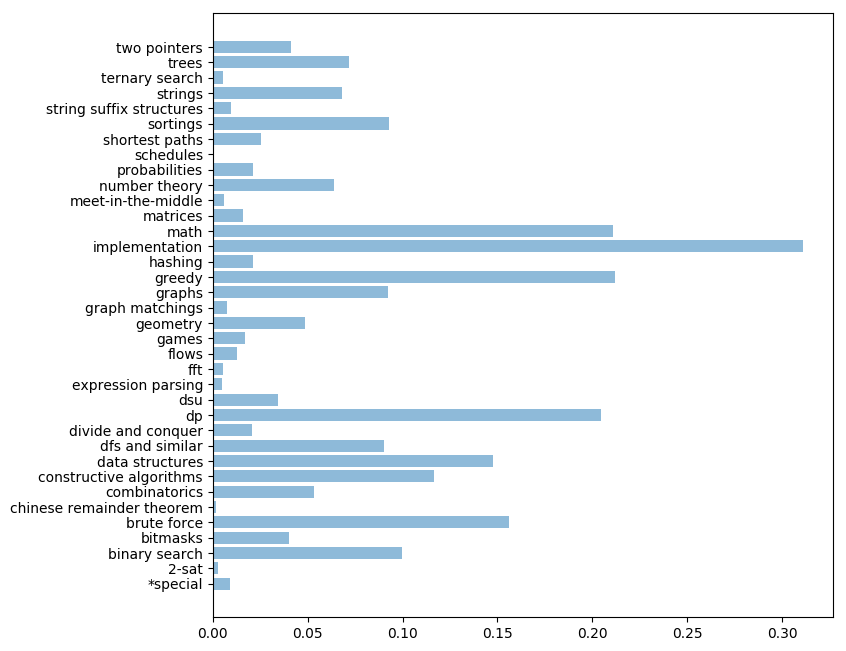

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'> <class 'sklearn.preprocessing.label.MultiLabelBinarizer'>


In [11]:
data_preprocessing()

In [12]:
def reduce_sample_imbalance(X_train,Y_train):
    
    global X, Y, mlb, distinct_tags
    
    X_train = pd.DataFrame(X_train).values
    
    xtrain_col_index = X_train.shape[1]
    xtrain_row_index = X_train.shape[0]
    
    XY = np.column_stack((X_train,Y_train))
    
    labels = [0]*len(mlb.classes_)
    row_index_to_delete = []
    ratio = []
    
    for index in range(Y_train.shape[1]):
        ratio.append(np.sum(Y_train[:,index])/Y_train.shape[0])
        if np.sum(Y_train[:,index])/Y_train.shape[0] > 0.03:
            
            labels[index] = 1
            
    ratio.sort()
#     print(ratio)
    
    count_deletions = [0]*len(labels)
    for index in range(len(labels)):
        if labels[index] == 1:

            count_deletions[index] = int(np.sum(Y_train[:,index]) * 0.97)    
    
    for index in range(Y_train.shape[0]):
        flag_to_delete = True
        
        for yindex in range(X_train.shape[1],XY.shape[1]):
            if Y_train[index][yindex-X_train.shape[1]] == 1:
                if labels[yindex-X_train.shape[1]] == 0 or count_deletions[yindex-X_train.shape[1]] <= 0:
                    flag_to_delete = False
                    break
        
        if flag_to_delete:
            row_index_to_delete.append(index)
            for i in range(len(count_deletions)):
                count_deletions[i] -= Y_train[index][i]
    
        if sum(count_deletions) <= 0:
            break;
            
    XY = np.delete(XY, row_index_to_delete,axis=0)
    
    ratio = []
    for index in range(X_train.shape[1],XY.shape[1]):
        ratio.append(np.sum(XY[:,index])/XY.shape[0])
    
    plot_class_distribution(XY[:,X_train.shape[1]:],mlb.classes_)
    
    
    data_to_repeat_index = [1]*XY.shape[0]
    labels = [0]*len(mlb.classes_)
    ratio = []
    for index in range(xtrain_col_index,XY.shape[1]):
        ratio.append(np.sum(XY[:,index])/XY.shape[0])
        if np.sum(XY[:,index])/XY.shape[0] < 0.02:
            labels[index-xtrain_col_index] = 1
    

    ratio.sort()
        
    for index in range(XY.shape[0]):
        for yindex in range(X_train.shape[1],XY.shape[1]):
            if XY[index][yindex] == 1 and labels[yindex-X_train.shape[1]] > 0:
                data_to_repeat_index[index] = 100
                labels[yindex-X_train.shape[1]] = -1
    
    XY = np.repeat(XY, repeats = data_to_repeat_index, axis=0)

    X_train = XY[:,:X_train.shape[1]]
    Y_train = XY[:,X_train.shape[1]:]
            
#     X_train = pd.Series(X_train)
#     X_train = X_train.astype(str)
#     Y_train = Y_train.astype('int') 
    return X_train,Y_train

In [14]:
def oversample_train_data(X_train,Y_train):
    
    
    X_train = pd.DataFrame(X_train).values
    
    XY = np.column_stack((X_train,Y_train))
    
    labels = []
    data_to_repeat_index = [1]*Y_train.shape[0]
    
    for index in range(Y_train.shape[1]):
        if np.sum(Y_train[:,index])/Y_train.shape[0] < 0.02:
            labels.append(index)
    
    for index in range(Y_train.shape[0]):
        for label in labels:
            if Y_train[index][label] == 1:
                data_to_repeat_index[index] = 50
    

    XY = np.repeat(XY, repeats = data_to_repeat_index, axis=0)
    
    X_train = XY[:,:X_train.shape[1]]
    Y_train = XY[:,X_train.shape[1]:]
        
    return X_train,Y_train

In [15]:
global X, Y, mlb, distinct_tags

n_most_common_words = 1000
max_len = 500

tokenizer = Tokenizer(num_words=n_most_common_words, filters=';/@?`~', lower=False)
tokenizer.fit_on_texts(X.values)
sequences = tokenizer.texts_to_sequences(X.values)
word_index = tokenizer.word_index
_X = pad_sequences(sequences, maxlen=max_len)


X_train, X_validation, Y_train, Y_validation = train_test_split(_X, Y, test_size = 0.2, random_state = 0)

# plot_class_distribution(Y_train,mlb.classes_)
X_train,Y_train = reduce_sample_imbalance(X_train,Y_train)
# X_train,Y_train = oversample_train_data(X_train,Y_train)
# plot_class_distribution(Y_train,mlb.classes_)
# plot_class_distribution(Y_validation,mlb.classes_)


epochs = 1
emb_dim = 60
batch_size = 250

print((X_train.shape, Y_train.shape, X_validation.shape, Y_validation.shape))

model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim))
# , recurrent_dropout=0.3
model.add(LSTM(128, dropout=0.1))
model.add(Dense(36, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,
                    callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])
print(model.summary())

((180692, 500), (180692, 36), (7958, 500), (7958, 36))
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 144553 samples, validate on 36139 samples
Epoch 1/1
144553/144553 [==============================] - 902s 6ms/step - loss: 0.2120 - binary_accuracy: 0.9247 - val_loss: 0.1914 - val_binary_accuracy: 0.9259
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 60)          60000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               96768     
_________________________________________________________________
dense_1 (Dense)              (None, 36)                4644      
Total params: 161,412
Trainable pa

In [27]:
_y_predicted = model.predict(X_validation)

In [28]:
global X, Y, mlb, distinct_tags

# y_predicted = copy.deepcopy(_y_predicted)

# m = []
# for row in y_predicted:
#     m.append(row)

# final_prediction = []

# for row in m:
#     temp = []
#     val = np.sort(row)[-4]
#     for item in row:
#         if item < val:
#             temp.append(0)
#         else:
#             temp.append(1)
#     final_prediction.append(temp)


# final_prediction = np.array(final_prediction)

y_predicted = copy.deepcopy(_y_predicted)
predicted = [([0]*Y_validation.shape[1])]*Y_validation.shape[0]

cnt = 0
for row in y_predicted:
    count_tags = int(np.sum(Y_validation[cnt,:]))
    index_list = []
    
    predicted[cnt] = [0]*Y_validation.shape[1]

    for i in range(count_tags):
        max_val = -1
        max_index = -1
        row = list(row)
        for j in range(len(row)):
            if row[j] > max_val:

                max_index = j
                max_val = row[j]
        
        if max_val != -1 and max_index != -1:

            index_list.append(max_index)
            predicted[cnt][max_index] = 1
            row[max_index] = -10

    cnt += 1
    
    
final_prediction = predicted
final_prediction = np.array(final_prediction,dtype=np.int64)


print("Hamming_loss: ",hamming_loss(Y_validation,final_prediction))
print('Test recall_score is {}'.format(recall_score(Y_validation, final_prediction,average = 'weighted')))
print('Test precision_score is {}'.format(precision_score(Y_validation, final_prediction,average = 'weighted')))
print('Test f1_score is {}'.format(f1_score(Y_validation, final_prediction,average = 'weighted')))
print("roc_auc_score: ",roc_auc_score(Y_validation,final_prediction,average = 'weighted'))


all_labels = mlb.inverse_transform(final_prediction)
y_labels = mlb.inverse_transform(Y_validation)

for item, labels in zip(y_labels, all_labels):
        print('{0} => {1}'.format(item, ', '.join(labels)))


################################################################################

metrics_list = []
recall_list = []
precision_list = []
roc_auc_list = []
f1_score_list = []

classes_list = mlb.classes_
    
for col_index in range(Y_validation.shape[1]):
    recall_list.append(recall_score(Y_validation[:,col_index],final_prediction[:,col_index]))
    
for col_index in range(Y_validation.shape[1]):
    precision_list.append(precision_score(Y_validation[:,col_index],final_prediction[:,col_index]))
    
for col_index in range(Y_validation.shape[1]):
    f1_score_list.append(f1_score(Y_validation[:,col_index],final_prediction[:,col_index]))
    
for col_index in range(Y_validation.shape[1]):
    roc_auc_list.append(roc_auc_score(Y_validation[:,col_index],final_prediction[:,col_index]))

metrics_list = [mlb,classes_list,recall_list,precision_list,f1_score_list,roc_auc_list,Y_validation,final_prediction]

with open('LSTM_SVC_CodeForces', 'wb') as fp:
    pickle.dump(metrics_list, fp)

################################################################################


Hamming_loss:  0.08211164167434587
Test recall_score is 0.36719212352719643
Test precision_score is 0.4185405317110809
Test f1_score is 0.370921722328081
roc_auc_score:  0.6372614361293356
('bitmasks', 'combinatorics', 'dp', 'math', 'number theory') => brute force, combinatorics, implementation, math, matrices
('dp', 'dsu', 'graphs') => data structures, graphs, trees
('dfs and similar', 'number theory', 'trees') => brute force, meet-in-the-middle, number theory
('two pointers',) => brute force
('binary search', 'constructive algorithms', 'data structures') => data structures, string suffix structures, strings
('binary search', 'math') => geometry, ternary search
('binary search', 'greedy', 'implementation', 'sortings') => binary search, data structures, dp, matrices
('implementation',) => math
('graphs', 'greedy', 'shortest paths') => dsu, geometry, ternary search
('greedy', 'sortings') => binary search, two pointers
('binary search', 'data structures', 'greedy', 'two pointers') => com

('implementation',) => math
('binary search', 'data structures', 'trees') => data structures, dp, matrices
('geometry',) => math
('brute force', 'implementation') => string suffix structures, strings
('binary search', 'brute force', 'implementation') => *special, greedy, implementation
('binary search', 'geometry', 'two pointers') => binary search, dp, ternary search
('brute force', 'dp') => bitmasks, brute force
('greedy', 'math') => geometry, ternary search
('combinatorics', 'math', 'strings') => dp, math, number theory
('sortings',) => implementation
('math',) => math
('dp', 'implementation') => implementation, ternary search
('graphs', 'math', 'number theory', 'shortest paths') => data structures, dfs and similar, graph matchings, trees
('greedy',) => implementation
('dp', 'graph matchings', 'greedy', 'sortings', 'two pointers') => 2-sat, dfs and similar, graph matchings, graphs, trees
('data structures', 'dsu') => data structures, string suffix structures
('constructive algorithms